### **Here I have used lazypredict to check the given dataset performance on various algorithim**

In [2]:
import pandas as pd
import numpy as np
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

D:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df= pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X=df.drop('pIC50',axis=1) ###Dependent Feature
y=df['pIC50'] ### Independent feature

In [7]:
###Removing low variance input features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8*(1-0.8)))
X=selection.fit_transform(X)
X.shape

(4695, 137)

In [33]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Comparing the different model**

In [34]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)


100%|██████████| 42/42 [00:00<?, ?it/s]


In [37]:
models_test,predictions_test = clf.fit(X_test, X_test, Y_test, Y_test)

100%|██████████| 42/42 [00:00<?, ?it/s]


**Data visualization of model performance**

In [38]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.86,0.87,0.57,5.28
DecisionTreeRegressor,0.86,0.87,0.57,0.12
ExtraTreeRegressor,0.86,0.87,0.57,0.10
ExtraTreesRegressor,0.86,0.87,0.57,4.96
RandomForestRegressor,0.82,0.83,0.64,3.57
XGBRegressor,0.82,0.83,0.64,0.79
BaggingRegressor,0.81,0.81,0.67,0.56
MLPRegressor,0.75,0.76,0.76,13.74
HistGradientBoostingRegressor,0.67,0.68,0.87,3.49


[(0.0, 1.0)]

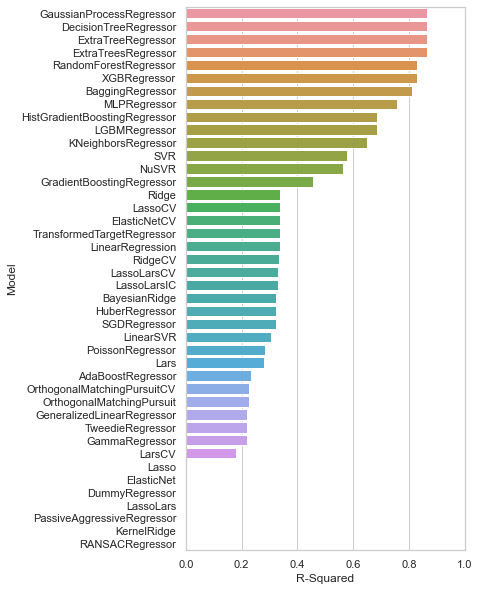

In [39]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

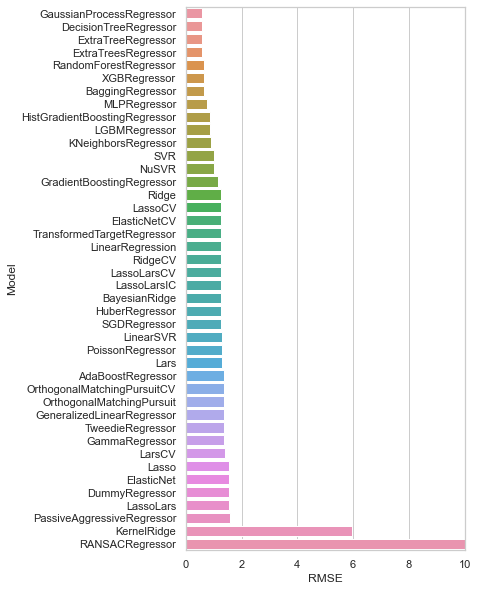

In [42]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('RMSE.jpg')